In [4]:
%run imports.py

Files already downloaded and verified
Preparing data..
Files already downloaded and verified
GPU available:  False
OS:  linux


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [11]:
model=model_actions.load("checkpoints/bs_128_sch_plateau/bs_128_sch_plateau_epoch_160")

In [12]:
conv_w=[]
for name, param in model.named_parameters():
    if "conv" in name and param.size()[2] == 3: # kernels 3x3
        for i in param.tolist():
            for j in i:
                conv_w.append(j)

In [13]:
conv_w_flat = np.array(conv_w).flatten()

In [14]:
print(min(conv_w_flat))
print(max(conv_w_flat))
print(conv_w_flat.mean())
print(conv_w_flat.std())

-0.5033373236656189
0.4561920464038849
-0.00017370819079944112
0.00780817245143656


In [18]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')

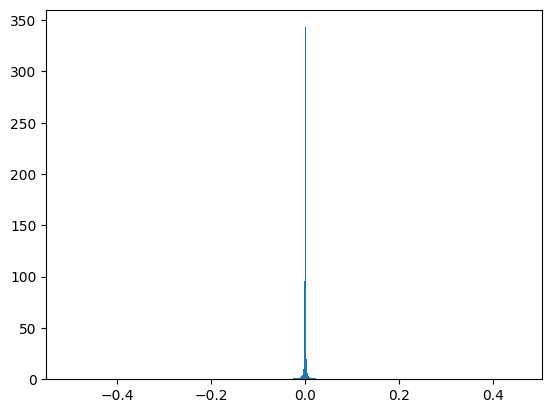

In [19]:
_=plt.hist(conv_w_flat, bins=500, density=True)

# reviewing weights as the train progresses

In [14]:

w_dict={}
w_dict["min"]=[]
w_dict["max"]=[]
w_dict["mean"]=[]
w_dict["std"]=[]
for i in range(1,161):
    if i%20==0:
        model=model_actions.load("checkpoints/bs_128_sch_plateau/bs_128_sch_plateau_epoch_"+str(i))
        
        conv_w=[]
        for name, param in model.named_parameters():
            if "conv" in name and param.size()[2] == 3: # kernels 3x3
                for i in param.tolist():
                    for j in i:
                        conv_w.append(j)

        conv_w_flat = np.array(conv_w).flatten()

        w_dict["min"].append(min(conv_w_flat))
        w_dict["max"].append(max(conv_w_flat))
        w_dict["mean"].append(conv_w_flat.mean())
        w_dict["std"].append(conv_w_flat.std())


In [15]:
w_dict

{'min': [-0.5563170909881592,
  -0.5044418573379517,
  -0.5033373236656189,
  -0.5033373236656189,
  -0.5033373236656189,
  -0.5033373236656189,
  -0.5033373236656189,
  -0.5033373236656189],
 'max': [0.5666592717170715,
  0.4577845335006714,
  0.4561920464038849,
  0.4561920464038849,
  0.4561920464038849,
  0.4561920464038849,
  0.4561920464038849,
  0.4561920464038849],
 'mean': [-0.00019852549446635752,
  -0.00017359497578523303,
  -0.00017370819429305036,
  -0.00017370819377045778,
  -0.0001737081910292254,
  -0.00017370819162299583,
  -0.00017370819035691633,
  -0.00017370819079944112],
 'std': [0.009245211389166856,
  0.007829111244816984,
  0.007808172456790296,
  0.007808172455878228,
  0.00780817245470646,
  0.007808172453746077,
  0.007808172452475872,
  0.00780817245143656]}

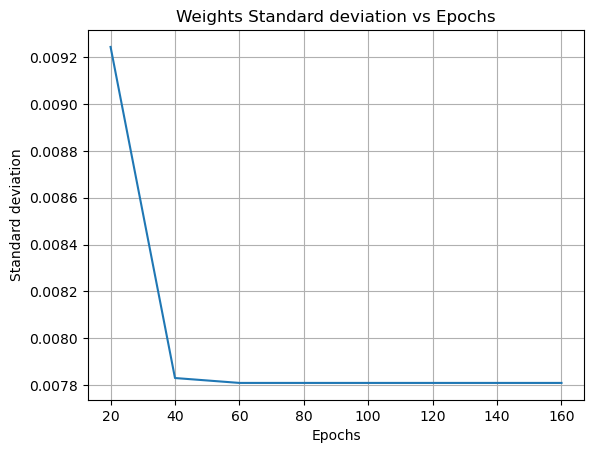

In [20]:
x=np.array(range(1,9))*20
plt.plot(x,w_dict["std"])
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Standard deviation")
plt.title("Weights Standard deviation vs Epochs")
plt.show()

In [11]:

my_dict={}
my_dict["my"]="test"